In [1]:
from rnamodif.data_utils.kmer_dataloader import MyKmerMixedDataset
pos_path_nia = '/home/jovyan/taiyaki_test/mapped_reads_2/m6A_33'
neg_path_nia = '/home/jovyan/taiyaki_test/mapped_reads_2/m6A_0'
pos_path = '/home/jovyan/taiyaki_test/mapped_reads_2/RNAAB090763_m6A'
neg_path = '/home/jovyan/taiyaki_test/mapped_reads_2/RNAAB089716_m6A_UNM'

novoa_train_dset = MyKmerMixedDataset(pos_path, neg_path,  max_kmer_len=70*5, batch_limit=[0], dont_pad=True, limit_avg_base=True)
nia_train_dset = MyKmerMixedDataset(pos_path_nia, neg_path_nia, max_kmer_len=70*5, batch_limit=[0], dont_pad=True, limit_avg_base=True)

novoa_valid_dset = MyKmerMixedDataset(pos_path, neg_path, max_kmer_len=70*5, batch_limit=[1], dont_pad=True, limit_avg_base=True)
# nia_valid_dset = MyKmerMixedDataset(pos_path_nia, neg_path_nia, max_kmer_len=70*5, batch_limit=[1], dont_pad=True, limit_avg_base=True)

['Batch_0', 'Batch_1']
processing Batch_0


100%|██████████| 25000/25000 [06:35<00:00, 63.14it/s]


dset size None
['Batch_0', 'Batch_1', 'Batch_2']
processing Batch_0


100%|██████████| 25000/25000 [03:30<00:00, 118.63it/s] 


dset size None
['Batch_0', 'Batch_1', 'Batch_2', 'Batch_3']
processing Batch_0


100%|██████████| 25000/25000 [03:42<00:00, 112.32it/s] 


dset size None
['Batch_0', 'Batch_1']
processing Batch_1


100%|██████████| 16727/16727 [04:43<00:00, 58.93it/s] 


dset size None
['Batch_0', 'Batch_1', 'Batch_2']
processing Batch_1


100%|██████████| 25000/25000 [05:35<00:00, 74.41it/s]  

dset size None


In [2]:
# train_dset = novoa_train_dset
# valid_dset = novoa_valid_dset
# valid_dset = nia_valid_dset
all_datasets = [('novoa_train',novoa_train_dset), ('novoa_valid',novoa_valid_dset), ('nia_train',nia_train_dset)]#, ('nia_valid',nia_valid_dset)]

novoa_train
40976
[('AGCCG', 47773), ('GCTAC', 47715), ('CTCGT', 47637), ('TTTGG', 46050), ('TTGCA', 44252), ('ACCTG', 44236), ('GGTGC', 43794), ('TCGTG', 42931), ('CCATC', 40976), ('GCGCG', 40794)]
novoa_train
39145
[('GCTAC', 44415), ('CACTA', 43263), ('TGAGG', 41836), ('AGCTA', 41750), ('TGTAA', 40245), ('CGGAT', 40103), ('TATGG', 39881), ('ATATG', 39275), ('CCATC', 39145), ('CGCTC', 38257)]
nia_train
26504
[('AGAAA', 105221), ('AAACC', 93695), ('TGACG', 87401), ('TTGAC', 85553), ('TTAAG', 80249), ('GTTTT', 79250), ('AGGTT', 79092), ('GGTTT', 77566), ('ACGAA', 77108), ('CGAAC', 76204)]
nia_train
28572
[('AGAAA', 109007), ('AAACC', 95855), ('TGACG', 87866), ('TTGAC', 87365), ('TTAAG', 80735), ('AGGTT', 80459), ('GTTTT', 80454), ('ACGAA', 79250), ('GGTTT', 78366), ('CGAAC', 77861)]


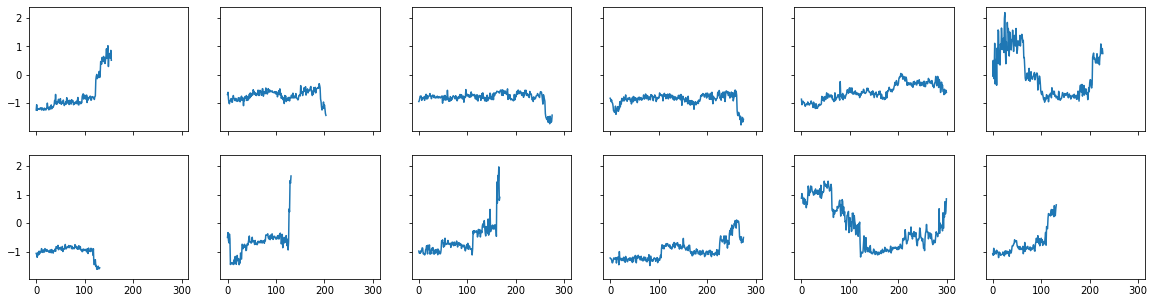

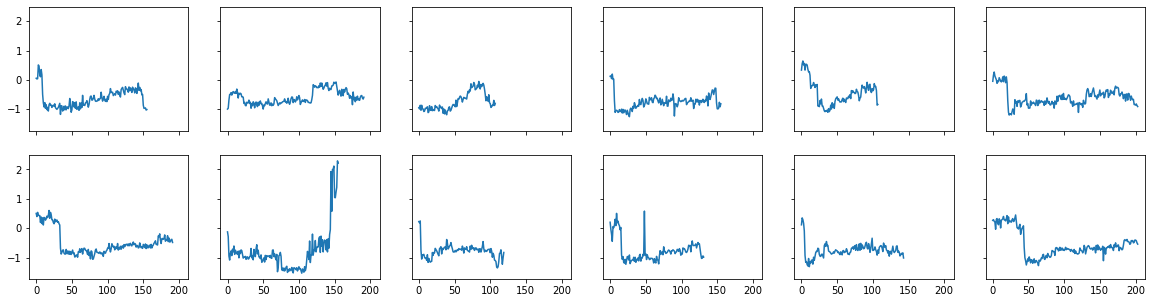

In [55]:
from matplotlib import pyplot as plt
samples = 6
for nickname, dset in [('novoa_train',novoa_train_dset), ('nia_train',nia_train_dset)]:
    splits = [dset.pos_dset, dset.neg_dset]
    fig, axs = plt.subplots(len(splits),samples, sharey=True, sharex=True, figsize=(20,5))
    for split in splits:
        split.change_kmer('CCATC')
        print(nickname)
        print(split.len)
        print(split.counts[:10])
    for i in range(samples):
        for j,d in enumerate(splits):
            ds = iter(d)
            axs[j][i].plot(next(ds)[0])
            fig.show()



In [56]:
import pandas as pd
df = pd.read_csv('../evaluation/events_results.csv')[['model','dataset','accuracy']]
new_df_logs = []
for m in df['model'].unique():
    subdf = df[df['model'] == m]
    new_log = {}
    new_log['model'] = m
    for d in subdf['dataset']:
        new_log[d] = (subdf[subdf['dataset']==d]['accuracy']).to_numpy()[0]
    new_df_logs.append(new_log)
df = pd.DataFrame(new_df_logs)

sub_df = df[6:][['model','z33','nov']].rename(columns={"z33": "nih 0vs33", "z10": "nih 0vs10","z5":'nih 0vs5', 'nov':'novoa unm vs mod'})

sub_df = sub_df.style.background_gradient(cmap='Blues', axis=None)
sub_df

,model,nih 0vs33,novoa unm vs mod
6,novoa_shapelets,0.534000,0.620000
7,nih_shapelets,0.550000,0.614000
8,novoa_SVC,0.517000,0.910000
9,nih_SVC,0.851000,0.525000
10,novoa_knn,0.519000,0.800000
11,nih_knn,0.737000,0.527000
12,novoa_kmeans_dtw,0.480000,0.570000
13,nih_kmeans_dtw,0.540000,0.490000


In [4]:
from tslearn.utils import to_time_series_dataset
import numpy as np

def prepare(dset, samples):
    X = []
    y = []
    ds = iter(dset)
    for _ in range(samples):
        sig, lab = next(ds)
        X.append(sig)
        y.append(lab)
    X = to_time_series_dataset(X)
    y = np.array(y).flatten()
    return X,y

tnX,tny = prepare(novoa_train_dset, 1000)
vnX,vny = prepare(novoa_valid_dset, 1000)
thX,thy = prepare(nia_train_dset, 1000)
# vhX,vhy = prepare(nia_train_dset, 1000) #TODO reuse dataset (next 1000)



pos kmer CCATC
neg kmer CCATC
pos kmer CCATC
neg kmer CCATC
pos kmer CCATC
neg kmer CCATC


# Variable length time-series classification

In [ ]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
print('Novoa data model')
for n in [2,3,5,10]:
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=n, n_jobs=64)
    knn.fit(tnX, tny)
    print(n, 'neighbors')
    print('novoa train acc', knn.score(tnX, tny))
    print('novoa valid acc', knn.score(vnX, vny))
    print('nih train acc', knn.score(thX, thy)) 
    
print('Nih data model')
for n in [2,3,5,10]:
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=n, n_jobs=64)
    knn.fit(thX, thy)
    print(n, 'neighbors')
    print('novoa train acc', knn.score(tnX, tny))
    print('novoa valid acc', knn.score(vnX, vny))
    print('nih train acc', knn.score(thX, thy)) 


Novoa data model
2 neighbors
novoa train acc 0.849


In [6]:
from tslearn.svm import TimeSeriesSVC
print('Novoa data model')
for kernel in ['gak']: #rbf, poly, sigmoid, not supported for variable length
    clf = TimeSeriesSVC(C=1.0, kernel=kernel, n_jobs=64)
    clf.fit(tnX, tny)
    print(kernel, 'kernel')
    print('novoa train acc', clf.score(tnX, tny))
    print('novoa valid acc', clf.score(vnX, vny))
    print('nih train acc', clf.score(thX, thy)) 
    
print('Nih data model')
for kernel in ['gak']: #rbf, poly, sigmoid, not supported for variable length
    clf = TimeSeriesSVC(C=1.0, kernel=kernel, n_jobs=64)
    clf.fit(thX, thy)
    print(kernel, 'kernel')
    print('novoa train acc', clf.score(tnX, tny))
    print('novoa valid acc', clf.score(vnX, vny))
    print('nih train acc', clf.score(thX, thy)) 

Novoa data model
gak kernel
novoa train acc 0.91
novoa valid acc 0.675
nih train acc 0.517
Nih data model
gak kernel
novoa train acc 0.525
novoa valid acc 0.495
nih train acc 0.851


In [5]:
from tslearn.shapelets import LearningShapelets

print('Novoa data model')

clf = LearningShapelets(n_shapelets_per_size=None, max_iter=10000, verbose=0)
clf.fit(np.nan_to_num(tnX), tny) #TODO hotfix for NAN loss 
print(clf.score(np.nan_to_num(tnX), tny))
print(clf.score(np.nan_to_num(vnX), vny)) 
print(clf.score(np.nan_to_num(thX), thy)) 


print('Nih data model')

clf = LearningShapelets(n_shapelets_per_size=None, max_iter=10000, verbose=0)
clf.fit(np.nan_to_num(thX), thy) #TODO hotfix for NAN loss 
print(clf.score(np.nan_to_num(tnX), tny))
print(clf.score(np.nan_to_num(vnX), vny)) 
print(clf.score(np.nan_to_num(thX), thy)) 

Novoa data model


/home/jovyan/my-conda-envs/RNAmodEnvRod/lib/python3.8/site-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
2023-02-27 22:07:12.868128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:07:15.341196: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43271 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:a3:00.0, compute capability: 8.6
2023-02-27 22:07:30.119322: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loade

0.62
0.604
0.534
Nih data model


/home/jovyan/my-conda-envs/RNAmodEnvRod/lib/python3.8/site-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


0.614
0.594
0.55


In [44]:
from sklearn.metrics import accuracy_score
from tslearn.clustering import KernelKMeans, TimeSeriesKMeans, silhouette_score
from sklearn.metrics import accuracy_score
import pandas as pd

res = pd.DataFrame()

train_dset = tnX
train_labels = tny
valid_dset = thX
valid_labels = thy

num_of_cl = 10
 
clf = TimeSeriesKMeans(n_clusters=num_of_cl, max_iter=100, metric='softdtw', verbose=0, n_jobs=64)
# clf = KernelKMeans(n_clusters=num_of_cl, max_iter=5, kernel='gak', n_jobs=10)
clf.fit(np.nan_to_num(train_dset))
# accuracy_score(y,clf.predict(X))
labels = clf.predict(train_dset)
y = np.array(train_labels)
print('train eval')
cluster_to_pred = {}
for cluster in range(num_of_cl):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_labels = y[cluster_indices]
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    if(len(counts) < 1):
        cluster_majority_class = 0
        continue
    cluster_majority_class = np.argmax(counts)
    cluster_to_pred[cluster] = cluster_majority_class
    print(f"Cluster {cluster}: {len(cluster_indices)} data points")
    if(len(counts) > 0):
        print(' -',round(counts[0]/sum(counts),2), 'ratio of negatives')
    for label, count in zip(unique_labels, counts):
        print(f" - {count} data points with class label {int(label)}")
acc = accuracy_score(y, [cluster_to_pred[l] for l in labels])

labels_v = clf.predict(valid_dset)
y_valid = np.array(valid_labels)
acc_valid = accuracy_score(y_valid, [cluster_to_pred[l] for l in labels_v])



res = res.append({'model':'novoa_kmeans','dset':'nov','acc':acc}, ignore_index=True)
res = res.append({'model':'novoa_kmeans','dset':'z33','acc':acc_valid},  ignore_index=True)
res.to_csv('kmeans_results.csv')
    


train eval
Cluster 0: 39 data points
 - 0.87 ratio of negatives
 - 34 data points with class label 0
 - 5 data points with class label 1
Cluster 1: 8 data points
 - 0.25 ratio of negatives
 - 2 data points with class label 0
 - 6 data points with class label 1
Cluster 2: 544 data points
 - 0.53 ratio of negatives
 - 288 data points with class label 0
 - 256 data points with class label 1
Cluster 3: 40 data points
 - 0.18 ratio of negatives
 - 7 data points with class label 0
 - 33 data points with class label 1
Cluster 4: 2 data points
 - 1.0 ratio of negatives
 - 2 data points with class label 1
Cluster 5: 116 data points
 - 0.55 ratio of negatives
 - 64 data points with class label 0
 - 52 data points with class label 1
Cluster 6: 228 data points
 - 0.42 ratio of negatives
 - 96 data points with class label 0
 - 132 data points with class label 1
Cluster 7: 4 data points
 - 0.5 ratio of negatives
 - 2 data points with class label 0
 - 2 data points with class label 1
Cluster 8: 2 dat

/tmp/ipykernel_101165/1531853333.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'model':'novoa_kmeans','dset':'nov','acc':acc}, ignore_index=True)
/tmp/ipykernel_101165/1531853333.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'model':'novoa_kmeans','dset':'z33','acc':acc_valid},  ignore_index=True)
